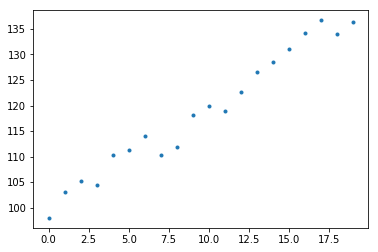

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

# 生成数据
size = 20
x = np.arange(size)
y = 100.0 + 2.0 * x + np.random.normal(scale=2, size=size)
plt.plot(x, y, '.');

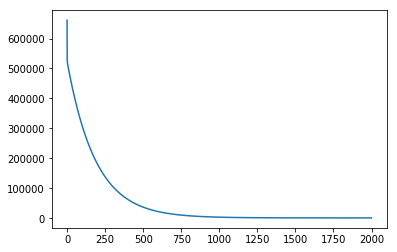

In [2]:
def to_matrix(x):
    """对每条数据补充 x0 = 1，返回 x 矩阵及数据个数"""
    m = x.shape[0]
    x_mat = np.array([np.ones(m), x]).T
    return x_mat, m

def compute_cost(x, y, theta):
    xx, m = to_matrix(x)
    return 0.5 * m * ((xx.dot(theta) - y)**2).sum()

def gradient_descent(x, y, theta, alpha, iternum):
    """实施梯度下降法
    theta: 参数向量
    alpha: learning rate
    iternum: 迭代次数
    """
    cost_history = []
    xx, m = to_matrix(x)
    for i in range(iternum):
        gradient = xx.T.dot(xx.dot(theta) - y)
        theta = theta - alpha / m * gradient
        cost_history.append(compute_cost(x, y, theta))
    return theta, cost_history


# 用 theta 表示参数向量，这里 theta = [b, w], yi = theta.dot(xi)
theta = np.array([0., 0.])  # 参数初始化
theta, cost_history = gradient_descent(x, y, theta, 0.01, 2000)

# cost 随迭代次数变化的曲线
plt.plot(cost_history);

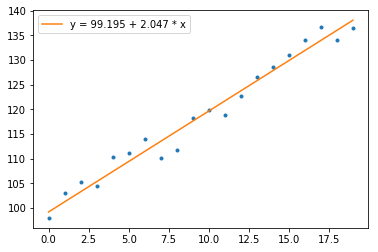

In [3]:
label = 'y = {:.3f} + {:.3f} * x'.format(*theta)
plt.plot(x, y, '.')
plt.plot(x, theta[0] + theta[1] * x, label=label)
plt.legend();

In [4]:
# normal equation 直接求解
from numpy.linalg import pinv
X = to_matrix(x)[0]
theta2 = pinv(X.T.dot(X)).dot(X.T).dot(y)
theta2

array([ 99.66043542,   2.01111133])